### Import Libraries & Load Data

In [1]:
# ==============================
# IMPORT LIBRARIES
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# LOAD DATASET
# ==============================
file_path = "../Datasets/Clean_dataset/Intensip Case Study 1.csv"   # Adjust path if needed
df = pd.read_csv(file_path, encoding='latin1')

print("Dataset Loaded Successfully")
df.head()

Dataset Loaded Successfully


,Week,Address,Number of delivered orders,Basket size,Bad rated orders due to wrong or Missing Products,Bad rated orders due to store packaging Issues,Bad rated orders due to store allergy not considered,Bad rated orders due to to Poor Quality,Cancelled Orders Due to Customer Absent,Cancelled Orders due to Partner Printer/internet issue,Cancelled Orders Due to Partner Products Not Available,Cancelled Orders Due to Partner Store Closed,Cancelled Orders Due to Store Cant Deliver,Refunds to customer,Total Order Complaint,Total Order Cancellation
0,04-Jan-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",104, 21.65,1,0,0,1,0,0,0,0,0, 3.25,2,0
1,01-Feb-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",124, 20.95,1,0,0,0,0,0,0,0,0, 3.14,1,0
2,08-Feb-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",71, 22.94,1,0,0,0,0,0,0,0,0, 11.47,1,0
3,15-Feb-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",76, 21.11,1,0,0,0,0,0,0,0,0, 3.17,1,0
4,08-Mar-25,"Av. de Monforte de Lemos, 12, Madrid, Spain",87, 22.43,1,0,0,1,0,0,0,0,0, 6.73,2,0


### Correct Cleaning Code

In [2]:
cols_to_clean = ["Basket size", "Refunds to customer"]

for col in cols_to_clean:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("", "", regex=False)   # remove corrupted euro symbol
        .str.replace("€", "", regex=False)   # just in case
        .str.strip()
    )

    df[col] = pd.to_numeric(df[col], errors="coerce")

### Basic Overview (Professional EDA Start)

In [3]:
# ==============================
# BASIC STRUCTURE
# ==============================
print("Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
df.describe()

Shape: (500, 16)

Data Types:
Week                                                       object
Address                                                    object
Number of delivered orders                                  int64
Basket size                                               float64
Bad rated orders due to wrong or Missing Products           int64
Bad rated orders due to store packaging Issues              int64
Bad rated orders due to store allergy not considered        int64
Bad rated orders due to to  Poor Quality                    int64
Cancelled Orders Due to Customer Absent                     int64
Cancelled Orders due to Partner Printer/internet issue      int64
Cancelled Orders Due to Partner Products Not Available      int64
Cancelled Orders Due to Partner Store Closed                int64
Cancelled Orders Due to Store Cant Deliver                  int64
Refunds to customer                                       float64
Total Order Complaint                         

,Number of delivered orders,Basket size,Bad rated orders due to wrong or Missing Products,Bad rated orders due to store packaging Issues,Bad rated orders due to store allergy not considered,Bad rated orders due to to Poor Quality,Cancelled Orders Due to Customer Absent,Cancelled Orders due to Partner Printer/internet issue,Cancelled Orders Due to Partner Products Not Available,Cancelled Orders Due to Partner Store Closed,Cancelled Orders Due to Store Cant Deliver,Refunds to customer,Total Order Complaint,Total Order Cancellation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,70.568000,19.800960,2.788000,0.082000,0.066000,0.346000,0.094000,0.064000,0.066000,0.118000,0.052000,18.563880,3.282000,0.394000
std,44.355792,3.206113,3.325232,0.295721,0.278926,0.662693,0.305533,0.460791,0.605291,0.514398,0.292347,32.248701,3.647064,1.135492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,17.807500,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.035000,1.000000,0.000000
50%,60.000000,19.460000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.150000,2.000000,0.000000
75%,102.000000,21.357500,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.912500,4.000000,0.000000
max,242.000000,30.860000,30.000000,2.000000,2.000000,4.000000,2.000000,6.000000,10.000000,4.000000,4.000000,465.600000,31.000000,14.000000


### Correlation Analysis

In [4]:
# ==============================
# CORRELATION MATRIX
# ==============================

numeric_df = df.select_dtypes(include=np.number)

correlation_matrix = numeric_df.corr()

correlation_matrix

,Number of delivered orders,Basket size,Bad rated orders due to wrong or Missing Products,Bad rated orders due to store packaging Issues,Bad rated orders due to store allergy not considered,Bad rated orders due to to Poor Quality,Cancelled Orders Due to Customer Absent,Cancelled Orders due to Partner Printer/internet issue,Cancelled Orders Due to Partner Products Not Available,Cancelled Orders Due to Partner Store Closed,Cancelled Orders Due to Store Cant Deliver,Refunds to customer,Total Order Complaint,Total Order Cancellation
Number of delivered orders,1.000000,-0.206798,0.462630,0.209876,0.139506,0.325594,0.197308,0.020377,0.100786,-0.090511,0.131552,0.316788,0.508655,0.107952
Basket size,-0.206798,1.000000,-0.086475,-0.024729,-0.065305,-0.069549,-0.066090,-0.044317,-0.015853,-0.093621,-0.048481,-0.020656,-0.098481,-0.099112
Bad rated orders due to wrong or Missing Products,0.462630,-0.086475,1.000000,0.101270,0.092900,0.263437,0.039379,0.267836,0.145363,-0.016979,0.095883,0.805925,0.974940,0.213769
Bad rated orders due to store packaging Issues,0.209876,-0.024729,0.101270,1.000000,0.080030,0.192392,0.069778,-0.023884,0.036879,-0.011040,0.043301,0.033461,0.214498,0.034889
Bad rated orders due to store allergy not considered,0.139506,-0.065305,0.092900,0.080030,1.000000,0.049677,-0.025914,-0.001746,-0.013983,-0.026454,-0.017596,0.019305,0.176698,-0.031650
Bad rated orders due to to Poor Quality,0.325594,-0.069549,0.263437,0.192392,0.049677,1.000000,0.056792,-0.000473,0.042876,0.032839,0.072449,0.142166,0.441296,0.071475
Cancelled Orders Due to Customer Absent,0.197308,-0.066090,0.039379,0.069778,-0.025914,0.056792,1.000000,0.028355,-0.033614,-0.057966,-0.009961,0.015917,0.049900,0.233840
Cancelled Orders due to Partner Printer/internet issue,0.020377,-0.044317,0.267836,-0.023884,-0.001746,-0.000473,0.028355,1.000000,-0.015175,-0.015015,0.034751,0.276682,0.242045,0.407493
Cancelled Orders Due to Partner Products Not Available,0.100786,-0.015853,0.145363,0.036879,-0.013983,0.042876,-0.033614,-0.015175,1.000000,0.180899,0.308990,0.118740,0.142247,0.679366
Cancelled Orders Due to Partner Store Closed,-0.090511,-0.093621,-0.016979,-0.011040,-0.026454,0.032839,-0.057966,-0.015015,0.180899,1.000000,0.252289,-0.005954,-0.012432,0.592713


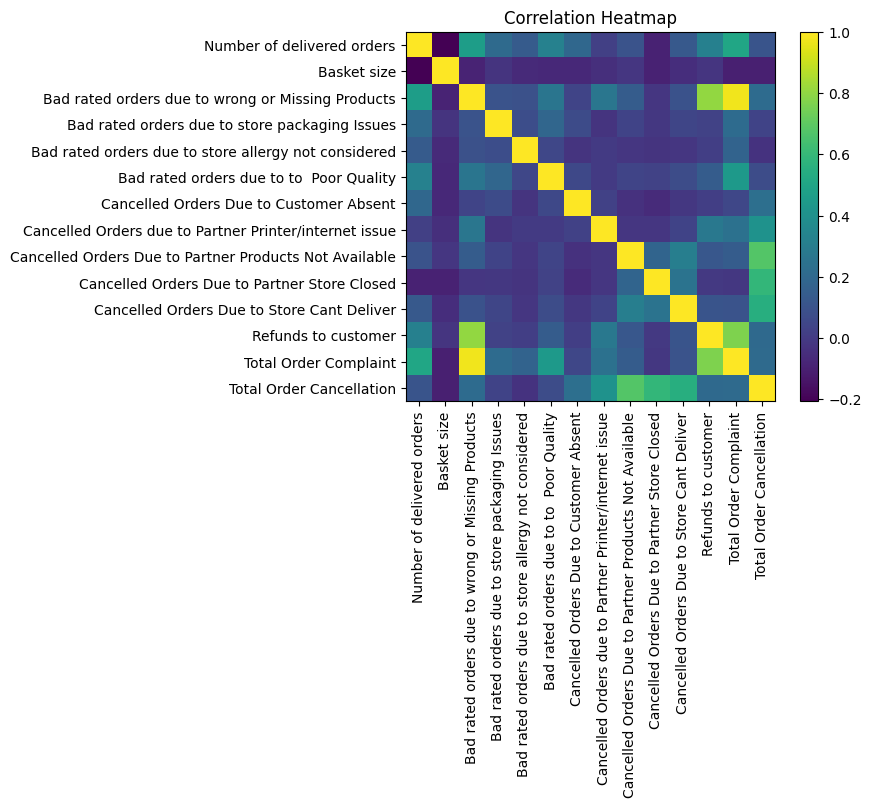

In [5]:
# Heatmap

plt.figure()
plt.imshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Heatmap")
plt.colorbar()
plt.show()

### Strong Correlations (Sorted)

In [6]:
# ==============================
# TOP CORRELATIONS
# ==============================

corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs.sort_values(ascending=False)

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs < 1]

corr_pairs.head(20)

Bad rated orders due to wrong or Missing Products       Total Order Complaint                                     0.974940
Total Order Complaint                                   Bad rated orders due to wrong or Missing Products         0.974940
Refunds to customer                                     Bad rated orders due to wrong or Missing Products         0.805925
Bad rated orders due to wrong or Missing Products       Refunds to customer                                       0.805925
Refunds to customer                                     Total Order Complaint                                     0.764829
Total Order Complaint                                   Refunds to customer                                       0.764829
Total Order Cancellation                                Cancelled Orders Due to Partner Products Not Available    0.679366
Cancelled Orders Due to Partner Products Not Available  Total Order Cancellation                                  0.679366
Total Order Canc

### Skewness Analysis

In [7]:
# ==============================
# SKEWNESS CHECK
# ==============================

skewness = numeric_df.skew().sort_values(ascending=False)
skewness

Cancelled Orders Due to Partner Products Not Available    12.490337
Cancelled Orders due to Partner Printer/internet issue     9.244473
Cancelled Orders Due to Store Cant Deliver                 7.833419
Refunds to customer                                        7.084283
Total Order Cancellation                                   6.143125
Cancelled Orders Due to Partner Store Closed               5.402006
Bad rated orders due to store allergy not considered       4.559003
Bad rated orders due to store packaging Issues             3.733694
Cancelled Orders Due to Customer Absent                    3.206152
Bad rated orders due to wrong or Missing Products          3.154041
Total Order Complaint                                      2.701607
Bad rated orders due to to  Poor Quality                   2.425418
Number of delivered orders                                 0.733117
Basket size                                               -0.231388
dtype: float64

In [9]:
# Identify Highly Skewed Features

high_skew = skewness[abs(skewness) > 2]
high_skew

Cancelled Orders Due to Partner Products Not Available    12.490337
Cancelled Orders due to Partner Printer/internet issue     9.244473
Cancelled Orders Due to Store Cant Deliver                 7.833419
Refunds to customer                                        7.084283
Total Order Cancellation                                   6.143125
Cancelled Orders Due to Partner Store Closed               5.402006
Bad rated orders due to store allergy not considered       4.559003
Bad rated orders due to store packaging Issues             3.733694
Cancelled Orders Due to Customer Absent                    3.206152
Bad rated orders due to wrong or Missing Products          3.154041
Total Order Complaint                                      2.701607
Bad rated orders due to to  Poor Quality                   2.425418
dtype: float64

### Distribution Plots (One by One Required Format)

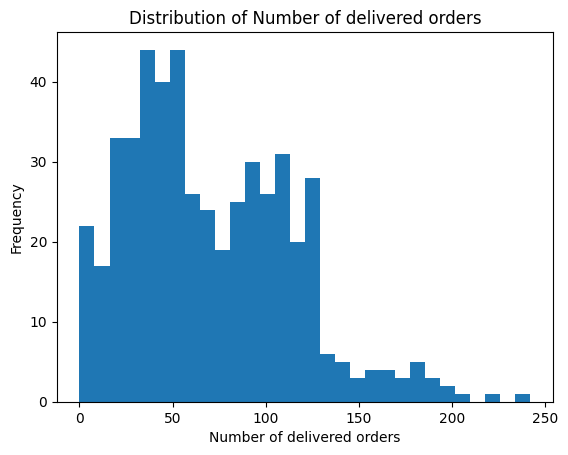

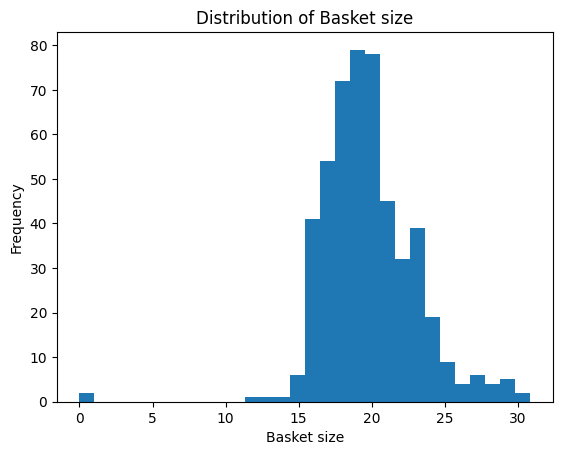

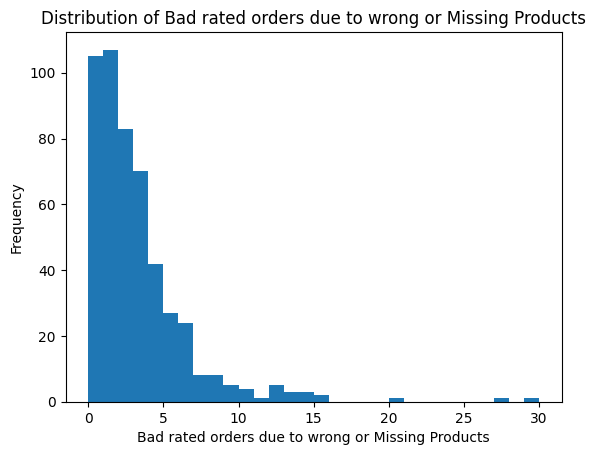

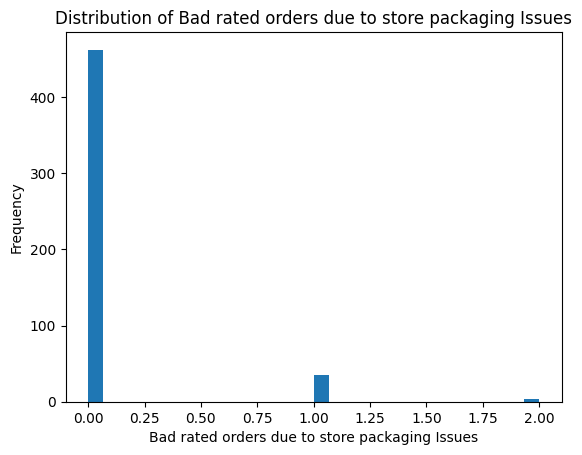

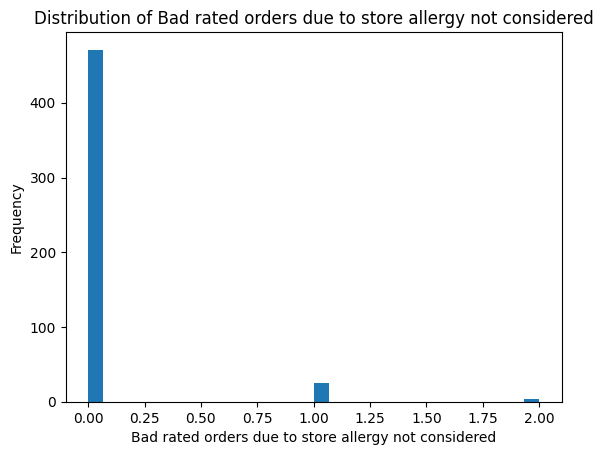

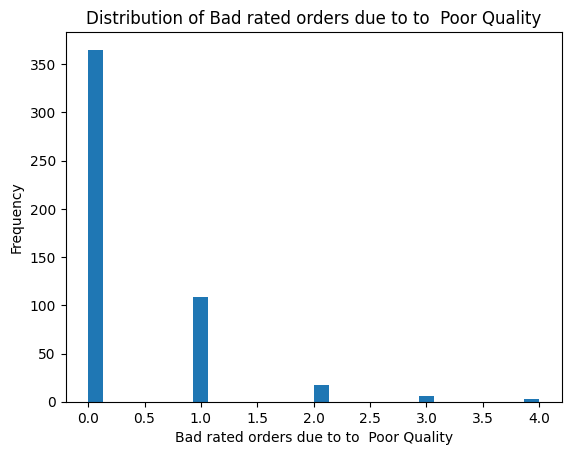

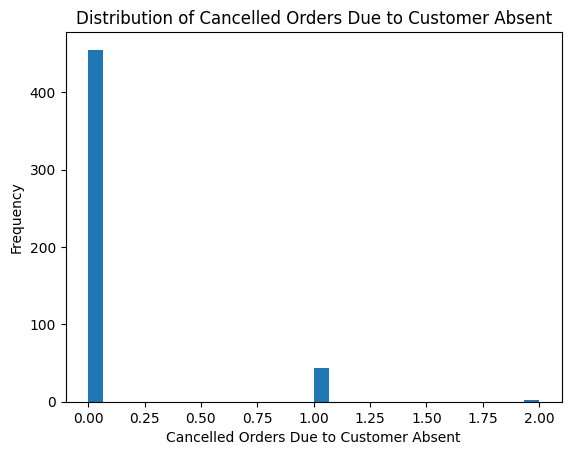

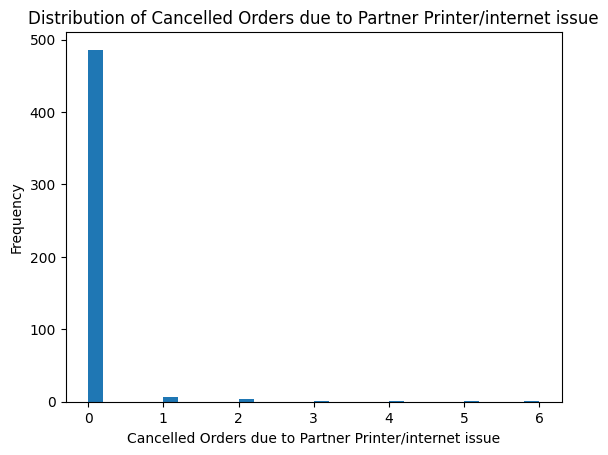

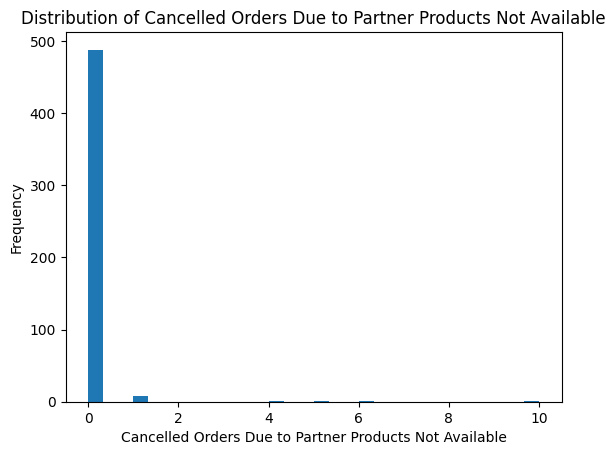

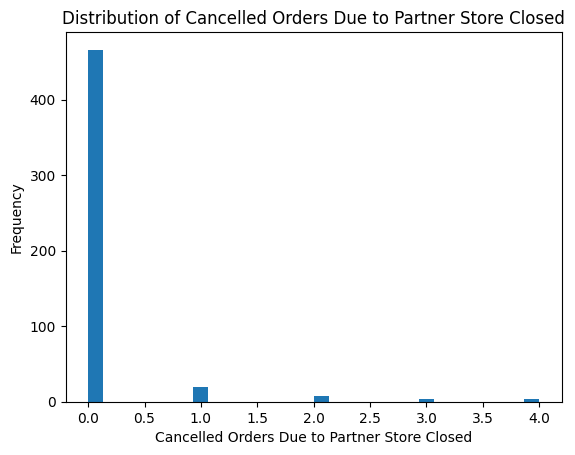

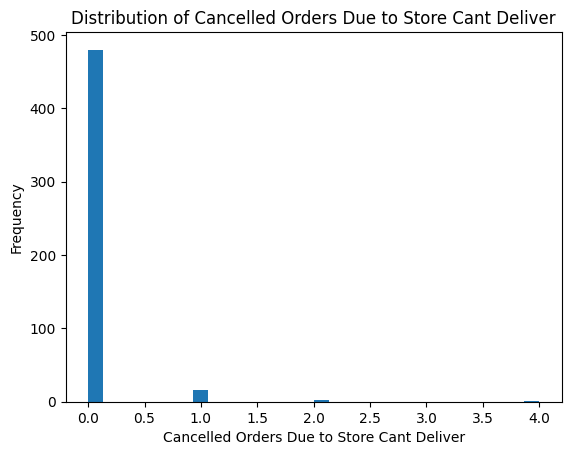

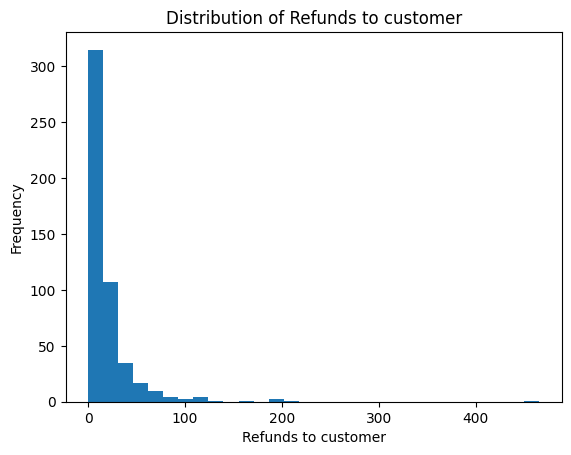

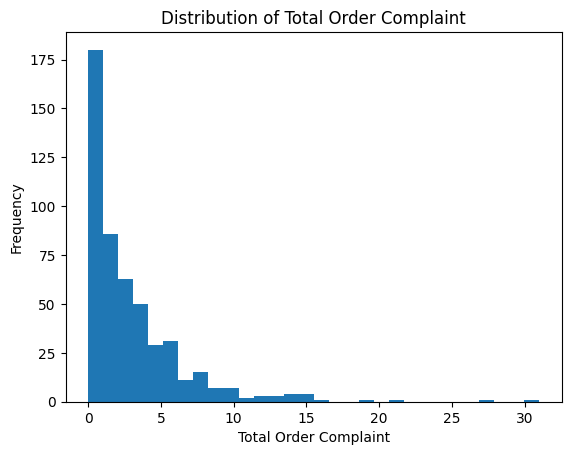

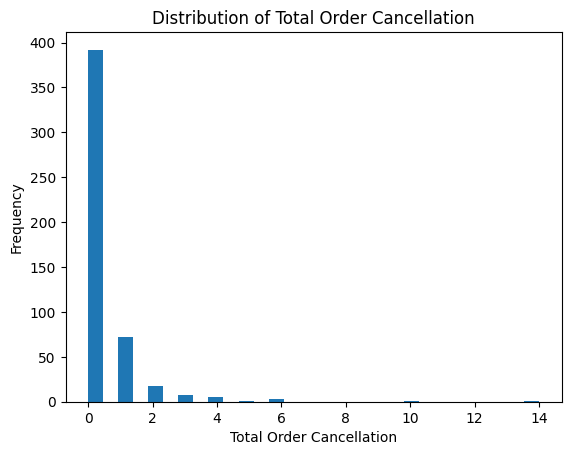

In [10]:
# ==============================
# HISTOGRAMS
# ==============================

for column in numeric_df.columns:
    plt.figure()
    plt.hist(numeric_df[column].dropna(), bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

### Log Transformation (For Skewed Variables)

In [11]:
# ==============================
# LOG TRANSFORMATION
# ==============================

log_df = numeric_df.copy()

for column in high_skew.index:
    log_df[column] = np.log1p(log_df[column])

print("Log Transformation Applied to Highly Skewed Features")
log_df.skew().sort_values(ascending=False)

Log Transformation Applied to Highly Skewed Features


Cancelled Orders Due to Partner Products Not Available    8.848506
Cancelled Orders due to Partner Printer/internet issue    7.048841
Cancelled Orders Due to Store Cant Deliver                5.574658
Cancelled Orders Due to Partner Store Closed              4.224313
Bad rated orders due to store allergy not considered      4.075819
Bad rated orders due to store packaging Issues            3.385921
Cancelled Orders Due to Customer Absent                   2.978674
Total Order Cancellation                                  2.363323
Bad rated orders due to to  Poor Quality                  1.476668
Number of delivered orders                                0.733117
Bad rated orders due to wrong or Missing Products         0.196108
Total Order Complaint                                     0.073737
Basket size                                              -0.231388
Refunds to customer                                      -0.321470
dtype: float64

### Outlier Detection (IQR Method)

In [13]:
# ==============================
# OUTLIER DETECTION
# ==============================

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Example:
outliers_complaint = detect_outliers_iqr(df, "Total Order Complaint")
outliers_complaint.head()

,Week,Address,Number of delivered orders,Basket size,Bad rated orders due to wrong or Missing Products,Bad rated orders due to store packaging Issues,Bad rated orders due to store allergy not considered,Bad rated orders due to to Poor Quality,Cancelled Orders Due to Customer Absent,Cancelled Orders due to Partner Printer/internet issue,Cancelled Orders Due to Partner Products Not Available,Cancelled Orders Due to Partner Store Closed,Cancelled Orders Due to Store Cant Deliver,Refunds to customer,Total Order Complaint,Total Order Cancellation
87,18-Jan-25,"Calle Aracne, Madrid, Spain",44,23.29,9,0,0,0,0,0,0,0,0,104.80,9,0
112,18-Jan-25,"Calle de Alonso Cano 32, Madrid, Spain",107,15.76,9,0,0,0,0,0,0,1,0,113.47,9,1
148,28-Dec-20,"Calle de Alcalá, 300, 28027 Madrid, Spain",109,20.39,6,0,0,4,0,0,0,1,1,61.17,10,2
149,25-Jan-25,"Calle de Alcalá, 300, 28027 Madrid, Spain",160,19.15,6,0,0,3,0,0,0,0,0,17.24,9,0
151,01-Feb-25,"Calle de Alcalá, 300, 28027 Madrid, Spain",184,20.23,10,0,0,0,0,0,0,0,0,101.15,10,0


## Predictive Modeling (Cancellation Prediction)

In [14]:
# ==============================
# SIMPLE REGRESSION MODEL
# ==============================

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = numeric_df.drop(columns=["Total Order Cancellation"])
y = numeric_df["Total Order Cancellation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("R2 Score:", r2_score(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))

R2 Score: 1.0
MSE: 4.911476102935691e-30


### Feature Importance (Regression Coefficients)

In [15]:
importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values(ascending=False)

Cancelled Orders Due to Partner Products Not Available    1.000000e+00
Cancelled Orders Due to Partner Store Closed              1.000000e+00
Cancelled Orders Due to Customer Absent                   1.000000e+00
Cancelled Orders Due to Store Cant Deliver                1.000000e+00
Cancelled Orders due to Partner Printer/internet issue    1.000000e+00
Bad rated orders due to to  Poor Quality                  1.561468e-15
Bad rated orders due to wrong or Missing Products         1.437218e-15
Number of delivered orders                                3.291767e-17
Basket size                                               1.734723e-18
Refunds to customer                                      -6.591949e-17
Total Order Complaint                                    -1.296706e-15
Bad rated orders due to store packaging Issues           -1.589684e-15
Bad rated orders due to store allergy not considered     -3.527086e-15
dtype: float64

### Advanced (PCA)

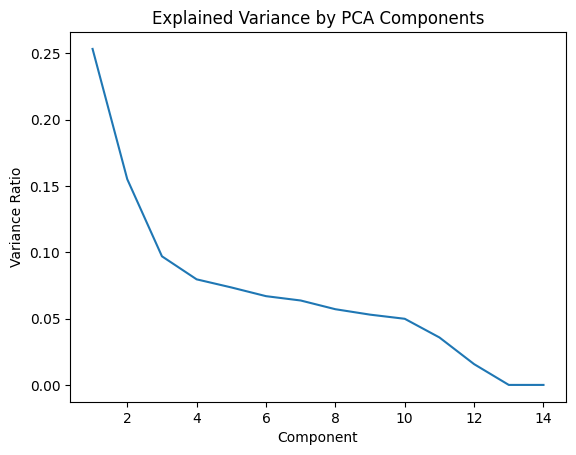

In [16]:
# ==============================
# PCA ANALYSIS
# ==============================

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_

plt.figure()
plt.plot(range(1, len(explained_variance)+1), explained_variance)
plt.title("Explained Variance by PCA Components")
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()